# Visualisation and Analysis of Sleuth Results

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
index = pd.read_csv("../data/sleuth_results/index.csv")
expression_matrix = pd.read_csv("../data/sleuth_results/expression_matrix.csv")
expression_matrix = expression_matrix.rename(columns = {"Unnamed: 0" : "target_id"})
transcript_level = pd.read_csv("../data/sleuth_results/transcript_level.csv")
gene_level = pd.read_csv("../data/sleuth_results/gene_level.csv")

In [4]:
try: 
    mean_expression_levels = pd.read_csv("../data/sleuth_results/mean_expression_levels.csv")
except:

    mean_expression_levels = pd.DataFrame(expression_matrix[expression_matrix.columns[0]])

    sample_groups = index.groupby(["cell_line", "condition"])["sample"]
    for group in sample_groups: 
        groupname = "_".join(group[0])
        replicates = group[1]
        exp_vals = expression_matrix[replicates]
        means = exp_vals.mean(axis=1)
        mean_expression_levels[groupname] = means

    mean_expression_levels.to_csv("../data/sleuth_results/mean_expression_levels.csv")

In [5]:
def log2FC(df, c1, c2):
    """
    Calculates the Log2 Fold-Change of some conditions c1 vs c2
    """
    change = df[c1] / df[c2]
    change = np.log2(change)
    name = "log2FC"
    comparison = [f"{c1}_vs_{c2}" for i in change]
    result = pd.DataFrame({"target_id" : df["target_id"], name : change, "comparison" : comparison})
    return result

In [5]:
mean_expression_levels

Unnamed: 0                                          target_id  \
0                0  ENST00000000233.10|ENSG00000004059.11|OTTHUMG0...   
1                1  ENST00000000412.8|ENSG00000003056.8|OTTHUMG000...   
2                2  ENST00000000442.11|ENSG00000173153.17|OTTHUMG0...   
3                3  ENST00000001008.6|ENSG00000004478.8|OTTHUMG000...   
4                4  ENST00000001146.7|ENSG00000003137.9|OTTHUMG000...   
...            ...                                                ...   
237007      237007  ENST00000684773.1|ENSG00000112319.20|OTTHUMG00...   
237008      237008  ENST00000684774.1|ENSG00000124356.17|OTTHUMG00...   
237009      237009  ENST00000684775.1|ENSG00000105642.16|OTTHUMG00...   
237010      237010  ENST00000684776.1|ENSG00000141556.22|OTTHUMG00...   
237011      237011  ENST00000684777.1|ENSG00000182923.20|OTTHUMG00...   

          A549_CTR     A549_KD     A549_KO    A549_NTC   H358_CTR    H358_KD  \
0        72.329083   69.366813   68.199856   57.590049  83.867679  77.658207   
1       150.460687  101.503202  104.365288   94.345691  83.140615  72.885177   
2        13.250470   14.806317    9.735007   12.443728  16.599234  19.828001   
3       114.659097   82.861531  105.762682  111.507286  59.129811  50.284680   
4         2.016546    3.675831    3.867980    1.780427   0.875006   2.155650   
...            ...         ...         ...         ...        ...        ...   
237007    1.974520    1.624749    1.597748    0.295764   0.117125   0.012331   
237008    0.002599    0.096613    0.223566    0.147993   0.528469   0.494215   
237009    0.065798    0.115726    0.025059    0.043176   0.000000   0.000000   
237010    0.057466    0.000000    0.044981    0.013413   0.032117   0.032889   
237011    0.000000    0.115286    0.000000    0.000000   0.140688   0.000000   

         H838_CTR       H838_KD  
0       67.745609  7.391629e+01  
1       97.145071  5.819498e+01  
2       17.792772  2.338105e+01  
3       61.654275  6.434645e+01  
4        0.838210  1.775231e+00  
...           ...           ...  
237007   1.261792  8.312249e-01  
237008   0.000509  1.753108e-09  
237009   0.169138  1.005218e-01  
237010   0.038059  1.544277e-01  
237011   0.195936  6.937382e-02  

[237012 rows x 10 columns]

In [6]:
mean_expression_levels.columns

Index(['Unnamed: 0', 'target_id', 'A549_CTR', 'A549_KD', 'A549_KO', 'A549_NTC',
       'H358_CTR', 'H358_KD', 'H838_CTR', 'H838_KD'],
      dtype='object')

In [7]:
a = log2FC(mean_expression_levels, "A549_KD", "A549_CTR")
a

/Users/NoahHK/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


target_id    log2FC  \
0       ENST00000000233.10|ENSG00000004059.11|OTTHUMG0... -0.060330   
1       ENST00000000412.8|ENSG00000003056.8|OTTHUMG000... -0.567861   
2       ENST00000000442.11|ENSG00000173153.17|OTTHUMG0...  0.160169   
3       ENST00000001008.6|ENSG00000004478.8|OTTHUMG000... -0.468576   
4       ENST00000001146.7|ENSG00000003137.9|OTTHUMG000...  0.866184   
...                                                   ...       ...   
237007  ENST00000684773.1|ENSG00000112319.20|OTTHUMG00... -0.281285   
237008  ENST00000684774.1|ENSG00000124356.17|OTTHUMG00...  5.216313   
237009  ENST00000684775.1|ENSG00000105642.16|OTTHUMG00...  0.814600   
237010  ENST00000684776.1|ENSG00000141556.22|OTTHUMG00...      -inf   
237011  ENST00000684777.1|ENSG00000182923.20|OTTHUMG00...       inf   

                 comparison  
0       A549_KD_vs_A549_CTR  
1       A549_KD_vs_A549_CTR  
2       A549_KD_vs_A549_CTR  
3       A549_KD_vs_A549_CTR  
4       A549_KD_vs_A549_CTR  
...                     ...  
237007  A549_KD_vs_A549_CTR  
237008  A549_KD_vs_A549_CTR  
237009  A549_KD_vs_A549_CTR  
237010  A549_KD_vs_A549_CTR  
237011  A549_KD_vs_A549_CTR  

[237012 rows x 3 columns]

In [51]:
def log10qVal(df, pvals):
    """
    Merges -log10 qvalues to the df dataframe from the pvals dataframe
    """
    
    qvalues = -np.log10(pvals["qval"])
    qvalues = pd.DataFrame({"target_id" : pvals["target_id"], "qval" : pvals["qval"], "-log10pval" : qvalues})
    
    result = pd.merge(df, qvalues, on = "target_id")

    return result

# b = log10pVal(a, transcript_level)
# b

<AxesSubplot:xlabel='log2FC', ylabel='-log10pval'>

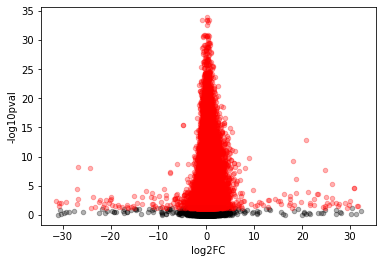

In [28]:
fig, ax = plt.subplots()
b.query("pval > 0.05").plot.scatter(x = "log2FC", y = "-log10pval", alpha = 0.3, c = "black", ax = ax)
b.query("pval <= 0.05").plot.scatter(x = "log2FC", y = "-log10pval", alpha = 0.3, c = "red", ax = ax)

# import plotly.express as px

# px.scatter(
#     x = b["log2FC"], 
#     y = b["-log10pval"],
#     text = b["target_id"], 
#     # hoverinfo = "text",
# )

/Users/NoahHK/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='log2FC', ylabel='-log10pval'>

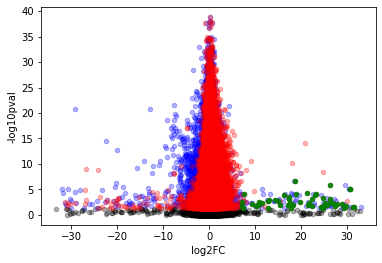

In [124]:
def volcano_plot(c, ref, **kwargs):
    """
    Generates a basic volcano plot
    """
    a = log2FC(mean_expression_levels, c, ref)
    b = log10pVal(a, transcript_level)
    ax = kwargs.pop("ax", None) 
    default_color = kwargs.pop("default_color", "black")
    signif_color = kwargs.pop("signif_color", "red")
    alpha = kwargs.pop("alpha", 0.3)
    if ax is None:
        fig, ax = plt.subplots()
    b.query("pval > 0.05").plot.scatter(x = "log2FC", y = "-log10pval", alpha = alpha, c = default_color, ax = ax, **kwargs)
    b.query("pval <= 0.05").plot.scatter(x = "log2FC", y = "-log10pval", alpha = alpha, c = signif_color, ax = ax, **kwargs)
    return b 

fig, axs = plt.subplots(1)
first = volcano_plot(c = "A549_KO", ref = "A549_CTR", ax = axs, signif_color ="blue")
second = volcano_plot(c = "A549_KD", ref = "A549_CTR", ax = axs)

total = first.join(second, lsuffix = "_s")
# filter out any inf entries
total = total.query("log2FC_s not in  (inf, -inf) and log2FC not in  (inf, -inf)")


fold_threshold = 7

query = f"""
            (`pval_s` < 0.05 & `pval` < 0.05) and \
            ( \
                ({fold_threshold} < log2FC & {fold_threshold} < log2FC_s) or \
                (log2FC < -{fold_threshold} & log2FC_s < -{fold_threshold}) \
            ) 

         """

total.query(query).plot.scatter(x = "log2FC", y = "-log10pval", color = "green",  alpha = 0.9, ax = axs)

/Users/NoahHK/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


69251    Text(30.736215338387638, 5.152211294324926, 'E...
73174    Text(30.736215338387638, 5.152211294324926, 'E...
dtype: object

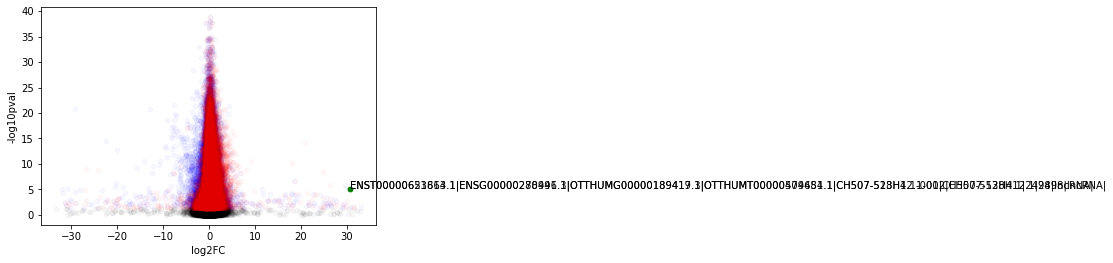

In [123]:
candidates = pd.read_csv("candidates.csv")



fig, axs = plt.subplots(1)
first = volcano_plot(c = "A549_KO", ref = "A549_CTR", ax = axs, signif_color ="blue", alpha = 0.03)
second = volcano_plot(c = "A549_KD", ref = "A549_CTR", ax = axs, alpha = 0.03)


t = total[total["target_id"].isin(candidates["target_id"])]
t.plot.scatter(x = "log2FC", y = "-log10pval", ax = axs, color = "green")
t[['log2FC','-log10pval','target_id']].apply(lambda x: axs.text(*x),axis=1)


<AxesSubplot:xlabel='log2FC', ylabel='-log10pval'>

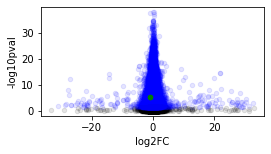

In [146]:
cell_line = "H838"
c = "KD"

fig, axs = plt.subplots(1, figsize = (4,2))
first = volcano_plot(c = f"{cell_line}_{c}", ref = f"{cell_line}_CTR", ax = axs, signif_color ="blue", alpha  =.1)
total = first
# total = first.join(second, lsuffix = "_s")
# filter out any inf entries
total = total.query("log2FC not in  (inf, -inf)")


fold_threshold = 7

t = total[total["target_id"].isin(candidates["target_id"])]
# t = total[total["target_id"].str.contains("lncRNA")]
t.plot.scatter(x = "log2FC", y = "-log10pval", color = "green",  alpha = 0.9, ax = axs)


In [147]:
t

target_id    log2FC  \
69251  ENST00000623664.1|ENSG00000278996.1|OTTHUMG000... -0.845036   
73174  ENST00000651813.1|ENSG00000280441.3|OTTHUMG000... -0.845036   

                comparison      pval  -log10pval  
69251  H838_KD_vs_H838_CTR  0.000007    5.152211  
73174  H838_KD_vs_H838_CTR  0.000007    5.152211

In [7]:
a_kd = pd.read_csv("../data/testing/A549_wt_conditionKD_transcript.csv")

<AxesSubplot:xlabel='b', ylabel='log10qval'>

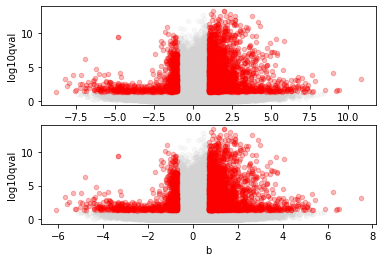

In [105]:
a_kd["log2FC"] = np.log2(np.exp(a_kd["b"]))
a_kd["log10qval"] = -np.log10(a_kd["qval"])
fig, ax = plt.subplots(2)
a_kd.plot.scatter(x = "log2FC", y = "log10qval", c = "lightgray", alpha = 0.15, ax = ax[0])
a_kd.plot.scatter(x = "b", y = "log10qval", c = "lightgray", alpha = 0.15, ax = ax[1])

threshold = 1
t_q = a_kd.query(f"qval < 0.05 & (log2FC < -{threshold} or log2FC > {threshold})")
t_q.plot.scatter(x = "log2FC", y = "log10qval", c = "red", alpha = 0.25, ax = ax[0])
t_q.plot.scatter(x = "b", y = "log10qval", c = "red", alpha = 0.25, ax = ax[1])

# a_kd.query(f"qval < 0.05 & abs(log2FC) / log10qval < 0.05 ").plot.scatter(x = "log2FC", y = "log10qval", c = "green", alpha = 0.5, ax = ax)


In [114]:
import scipy as sc 

genes = list(set(a_kd["ext_gene"]))
# sc.stats.combine_pvalues

qvalue_aggregates = {
    "ext_gene" : [],
    "stat" : [],
    "agg_qval" : []
}

for gene in genes:
    tmp = a_kd.query(f"ext_gene == '{gene}'")
    qvals = tmp["qval"]
    agg_qval = sc.stats.combine_pvalues(qvals)
    qvalue_aggregates["ext_gene"].append(gene)
    qvalue_aggregates["stat"].append(agg_qval[0])
    qvalue_aggregates["agg_qval"].append(agg_qval[1])

qvalue_aggregates = pd.DataFrame(qvalue_aggregates)

qvalue_aggregates

ext_gene       stat      agg_qval
0         RRP1  28.564561  1.465075e-03
1          MMD  26.754857  7.792821e-04
2         CTR9  23.659956  9.343978e-05
3         ILF3  88.813495  3.034814e-08
4       ZBTB39  31.393943  1.523674e-07
...        ...        ...           ...
18220   LRRC69   0.886604  6.419135e-01
18221   SLC1A4  31.907731  9.675310e-05
18222   SCNN1B   1.956186  3.760274e-01
18223     BBS1  13.731601  1.855899e-01
18224    TTPAL   6.941798  7.309280e-01

[18225 rows x 3 columns]

In [116]:
a_kd

Unnamed: 0                                          target_id  \
0               1  ENST00000371804.4|ENSG00000185745.10|OTTHUMG00...   
1               2  ENST00000409652.5|ENSG00000221963.6|OTTHUMG000...   
2               3  ENST00000474629.7|ENSG00000173193.15|OTTHUMG00...   
3               4  ENST00000296161.9|ENSG00000163840.10|OTTHUMG00...   
4               5  ENST00000376630.5|ENSG00000204592.9|OTTHUMG000...   
...           ...                                                ...   
77543       77544  ENST00000684656.1|ENSG00000116127.20|OTTHUMG00...   
77544       77545  ENST00000684688.1|ENSG00000090581.11|OTTHUMG00...   
77545       77546  ENST00000684698.1|ENSG00000125089.18|OTTHUMG00...   
77546       77547  ENST00000684736.1|ENSG00000288701.1|OTTHUMG000...   
77547       77548  ENST00000684766.1|ENSG00000065361.17|OTTHUMG00...   

       mean_obs            ens_gene ext_gene          pval          qval  \
0      7.593341  ENSG00000185745.10    IFIT1  1.849099e-18  5.091242e-14   
1      7.240113   ENSG00000221963.6    APOL6  1.969584e-18  5.091242e-14   
2      8.411008  ENSG00000173193.15   PARP14  1.708596e-18  5.091242e-14   
3      7.966313  ENSG00000163840.10    DTX3L  6.998129e-18  1.316150e-13   
4      8.466902   ENSG00000204592.9    HLA-E  8.486036e-18  1.316150e-13   
...         ...                 ...      ...           ...           ...   
77543  1.756162  ENSG00000116127.20    ALMS1  1.000000e+00  1.000000e+00   
77544  1.707337  ENSG00000090581.11    GNPTG  9.156567e-01  1.000000e+00   
77545  1.377578  ENSG00000125089.18   SH3TC1  1.000000e+00  1.000000e+00   
77546  3.906214   ENSG00000288701.1   PRRC2B  9.173523e-01  1.000000e+00   
77547  1.505859  ENSG00000065361.17    ERBB3  8.929933e-01  1.000000e+00   

       test_stat         rss  degrees_free    var_obs  tech_var   sigma_sq  \
0      85.685715  125.048627             3  11.368057  0.009299  11.358758   
1      85.558010   26.478557             3   2.407142  0.001218   2.405924   
2      85.845591   21.444918             3   1.949538  0.000709   1.948829   
3      82.992624   25.801648             3   2.345604  0.000721   2.344883   
4      82.602463   12.769200             3   1.160836  0.000330   1.160507   
...          ...         ...           ...        ...       ...        ...   
77543  -0.447390   37.967183             3   3.451562  2.252878   1.198684   
77544   0.514671    1.531853             3   0.139259  0.509203  -0.369944   
77545  -0.307255   38.814225             3   3.528566  1.226400   2.302166   
77546   0.506994    2.554602             3   0.232237  0.795119  -0.562883   
77547   0.614986    7.535153             3   0.685014  0.921916  -0.236902   

       smooth_sigma_sq  final_sigma_sq         b      se_b    log2FC  \
0             0.021085       11.358758  1.364338  0.087811  1.968323   
1             0.022515        2.405924  1.403508  0.046509  2.024834   
2             0.019662        1.948829  0.883075  0.037425  1.274008   
3             0.020127        2.344883  0.797403  0.044624  1.150409   
4             0.019654        1.160507  1.639804  0.033850  2.365737   
...                ...             ...       ...       ...       ...   
77543         0.841707        1.198684 -0.503260  1.751237 -0.726050   
77544         0.870813        0.870813 -0.350763  0.945094 -0.506044   
77545         1.080737        2.302166 -0.720282  1.760355 -1.039148   
77546         0.115890        0.115890  0.151944  0.765814  0.219209   
77547         0.996440        0.996440  0.022860  1.106938  0.032980   

       log10qval  
0      13.293176  
1      13.293176  
2      13.293176  
3      12.880695  
4      12.880695  
...          ...  
77543  -0.000000  
77544  -0.000000  
77545  -0.000000  
77546  -0.000000  
77547  -0.000000  

[77548 rows x 19 columns]

In [126]:
significant_changers

Unnamed: 0                                          target_id  \
1               2  ENST00000409652.5|ENSG00000221963.6|OTTHUMG000...   
4               5  ENST00000376630.5|ENSG00000204592.9|OTTHUMG000...   
7               8  ENST00000399808.5|ENSG00000142089.17|OTTHUMG00...   
8               9  ENST00000648006.3|ENSG00000166710.21|OTTHUMG00...   
10             11  ENST00000287156.9|ENSG00000156587.16|OTTHUMG00...   
...           ...                                                ...   
77178       77179  ENST00000677436.1|ENSG00000106636.9|OTTHUMG000...   
77181       77182  ENST00000677480.1|ENSG00000178035.13|OTTHUMG00...   
77251       77252  ENST00000678660.1|ENSG00000147140.17|OTTHUMG00...   
77268       77269  ENST00000678913.1|ENSG00000168610.16|OTTHUMG00...   
77298       77299  ENST00000679508.1|ENSG00000275700.6|OTTHUMG000...   

       mean_obs            ens_gene ext_gene          pval          qval  \
1      7.240113   ENSG00000221963.6    APOL6  1.969584e-18  5.091242e-14   
4      8.466902   ENSG00000204592.9    HLA-E  8.486036e-18  1.316150e-13   
7      7.023970  ENSG00000142089.17   IFITM3  2.949785e-17  2.859374e-13   
8      9.116227  ENSG00000166710.21      B2M  3.712495e-17  3.198851e-13   
10     7.618996  ENSG00000156587.16   UBE2L6  4.749390e-17  3.348234e-13   
...         ...                 ...      ...           ...           ...   
77178  1.878534   ENSG00000106636.9     YKT6  8.790351e-01  1.000000e+00   
77181  1.905404  ENSG00000178035.13   IMPDH2  9.117184e-01  1.000000e+00   
77251  3.197999  ENSG00000147140.17     NONO  9.283135e-01  1.000000e+00   
77268  1.653391  ENSG00000168610.16    STAT3  9.197627e-01  1.000000e+00   
77298  3.836546   ENSG00000275700.6     AATF  9.225700e-01  1.000000e+00   

       test_stat        rss  degrees_free   var_obs  tech_var  sigma_sq  \
1      85.558010  26.478557             3  2.407142  0.001218  2.405924   
4      82.602463  12.769200             3  1.160836  0.000330  1.160507   
7      80.080400  57.312499             3  5.210227  0.004119  5.206108   
8      79.614765  14.673142             3  1.333922  0.000248  1.333674   
10     79.116010  30.611166             3  2.782833  0.001106  2.781727   
...          ...        ...           ...       ...       ...       ...   
77178   0.675140  80.949053             3  7.359005  1.945319  5.413685   
77181   0.532397  55.195304             3  5.017755  2.488319  2.529436   
77251   0.456618  63.325595             3  5.756872  2.663323  3.093549   
77268   0.496030  61.700523             3  5.609138  1.829787  3.779352   
77298   0.483184  87.927290             3  7.993390  1.608917  6.384473   

       smooth_sigma_sq  final_sigma_sq         b      se_b    log2FC  \
1             0.022515        2.405924  1.403508  0.046509  2.024834   
4             0.019654        1.160507  1.639804  0.033850  2.365737   
7             0.023670        5.206108  2.630752  0.075087  3.795373   
8             0.020391        1.333674  1.452446  0.038737  2.095436   
10            0.021001        2.781727  1.859907  0.057126  2.683279   
...                ...             ...       ...       ...       ...   
77178         0.771393        5.413685 -1.914861  2.440246 -2.762561   
77181         0.756488        2.529436 -1.634588  2.027038 -2.358213   
77251         0.240479        3.093549  1.773017  2.178069  2.557923   
77268         0.903615        3.779352 -1.531774  2.146413 -2.209882   
77298         0.123830        6.384473 -1.991481  2.563676 -2.873100   

       log10qval  
1      13.293176  
4      12.880695  
7      12.543729  
8      12.495006  
10     12.475184  
...          ...  
77178  -0.000000  
77181  -0.000000  
77251  -0.000000  
77268  -0.000000  
77298  -0.000000  

[3930 rows x 19 columns]

<AxesSubplot:xlabel='log2FC', ylabel='log10qval'>

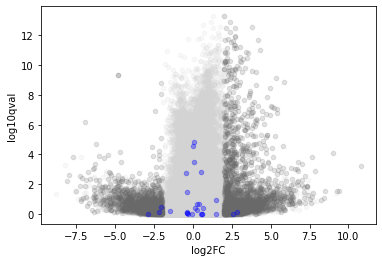

In [177]:
significant_changers = list(qvalue_aggregates.query("agg_qval < 0.05")["ext_gene"])

significant_changers = a_kd.query(f"ext_gene in {significant_changers}")
significant_changers = significant_changers.query("abs(log2FC) >= 2")

fig, ax = plt.subplots()
a_kd.plot.scatter(x = "log2FC", y = "log10qval", c = "lightgray", alpha = 0.15, ax = ax)
significant_changers.plot.scatter(x = "log2FC", y = "log10qval", c = "crimson", alpha = 0.15, ax = ax)

a_kd.query("ext_gene == 'NONO'").plot.scatter(x = "log2FC", y = "log10qval", c = "blue", alpha = 0.35, ax = ax)


/var/folders/1p/6pdz83894w5fnwm59tb6_3bh0000gp/T/ipykernel_2279/613797311.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q["normal"] = norms
/var/folders/1p/6pdz83894w5fnwm59tb6_3bh0000gp/T/ipykernel_2279/613797311.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q["qs"] = qs


<AxesSubplot:xlabel='normal', ylabel='qs'>

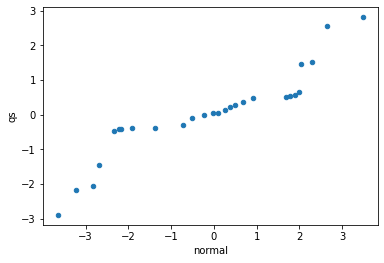

In [174]:
q = a_kd.query("ext_gene == 'NONO'")

import numpy as np 

xs = np.linspace(min(q["log2FC"]), max(q["log2FC"]), len(q))
norms = sc.stats.norm.rvs(xs)
norms = np.quantile(norms, list(np.linspace(0,1, len(q))))
qs = np.quantile(q["log2FC"], list(np.linspace(0,1, len(q))))
q["normal"] = norms
q["qs"] = qs
q.plot.scatter(x = "normal", y = "qs")


In [26]:
a_exp = pd.read_csv("../data/testing/A549_expression_matrix.csv")
a_exp = a_exp.rename(columns = {"Unnamed: 0" : "target_id"})

In [46]:
reps = 3

samples = list(a_exp.columns)
del samples[0]
samples = sorted(samples, key = lambda x: int(x[2:]))

groups = []
for i in range(0, len(samples), reps):
    group = samples[i:i+reps]
    groups.append(group)

mean_fc = pd.DataFrame(a_exp["target_id"])

for group, name in zip(groups, ["CTR", "KD", "KO", "NTC"]): 
    tmp = a_exp[group]
    tmp = tmp.mean(axis = 1)
    mean_fc[name] = tmp

In [55]:
mean_fc

ctr_vs_kd = log2FC(mean_fc, "CTR", "KD")


/Users/NoahHK/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [52]:
a_trans = pd.read_csv("../data/testing/A549_transcript_level.csv")

a_trans

Unnamed: 0                                          target_id  \
0               1  ENST00000371804.4|ENSG00000185745.10|OTTHUMG00...   
1               2  ENST00000409652.5|ENSG00000221963.6|OTTHUMG000...   
2               3  ENST00000474629.7|ENSG00000173193.15|OTTHUMG00...   
3               4  ENST00000296161.9|ENSG00000163840.10|OTTHUMG00...   
4               5  ENST00000376630.5|ENSG00000204592.9|OTTHUMG000...   
...           ...                                                ...   
77543       77544  ENST00000684656.1|ENSG00000116127.20|OTTHUMG00...   
77544       77545  ENST00000684688.1|ENSG00000090581.11|OTTHUMG00...   
77545       77546  ENST00000684698.1|ENSG00000125089.18|OTTHUMG00...   
77546       77547  ENST00000684736.1|ENSG00000288701.1|OTTHUMG000...   
77547       77548  ENST00000684766.1|ENSG00000065361.17|OTTHUMG00...   

                 ens_gene ext_gene          pval          qval  test_stat  \
0      ENSG00000185745.10    IFIT1  1.849099e-18  5.091242e-14  85.685715   
1       ENSG00000221963.6    APOL6  1.969584e-18  5.091242e-14  85.558010   
2      ENSG00000173193.15   PARP14  1.708596e-18  5.091242e-14  85.845591   
3      ENSG00000163840.10    DTX3L  6.998129e-18  1.316150e-13  82.992624   
4       ENSG00000204592.9    HLA-E  8.486036e-18  1.316150e-13  82.602463   
...                   ...      ...           ...           ...        ...   
77543  ENSG00000116127.20    ALMS1  1.000000e+00  1.000000e+00  -0.447390   
77544  ENSG00000090581.11    GNPTG  9.156567e-01  1.000000e+00   0.514671   
77545  ENSG00000125089.18   SH3TC1  1.000000e+00  1.000000e+00  -0.307255   
77546   ENSG00000288701.1   PRRC2B  9.173523e-01  1.000000e+00   0.506994   
77547  ENSG00000065361.17    ERBB3  8.929933e-01  1.000000e+00   0.614986   

              rss  degrees_free  mean_obs    var_obs  tech_var   sigma_sq  \
0      125.048627             3  7.593341  11.368057  0.009299  11.358758   
1       26.478557             3  7.240113   2.407142  0.001218   2.405924   
2       21.444918             3  8.411008   1.949538  0.000709   1.948829   
3       25.801648             3  7.966313   2.345604  0.000721   2.344883   
4       12.769200             3  8.466902   1.160836  0.000330   1.160507   
...           ...           ...       ...        ...       ...        ...   
77543   37.967183             3  1.756162   3.451562  2.252878   1.198684   
77544    1.531853             3  1.707337   0.139259  0.509203  -0.369944   
77545   38.814225             3  1.377578   3.528566  1.226400   2.302166   
77546    2.554602             3  3.906214   0.232237  0.795119  -0.562883   
77547    7.535153             3  1.505859   0.685014  0.921916  -0.236902   

       smooth_sigma_sq  final_sigma_sq  
0             0.021085       11.358758  
1             0.022515        2.405924  
2             0.019662        1.948829  
3             0.020127        2.344883  
4             0.019654        1.160507  
...                ...             ...  
77543         0.841707        1.198684  
77544         0.870813        0.870813  
77545         1.080737        2.302166  
77546         0.115890        0.115890  
77547         0.996440        0.996440  

[77548 rows x 15 columns]

In [60]:
ctr_vs_kd = log10qVal(ctr_vs_kd, a_trans)

<AxesSubplot:xlabel='log2FC', ylabel='-log10pval'>

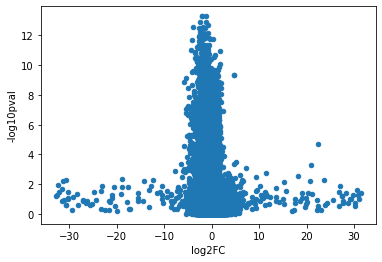

In [62]:
ctr_vs_kd.plot.scatter(x = "log2FC", y = "-log10pval")